# NN Ex1

In [1]:
#Packages
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

#Keras packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
#Helper functions
def gen_data(form):
    if form == "2blop":
        X, y = sklearn.datasets.make_blobs(n_samples=100, n_features=2, 
                                           centers=[[-1,-1], [1, 1]], 
                                           cluster_std=0.5)
    elif form == "blop_circle":
        X, y = sklearn.datasets.make_circles(n_samples=400, noise=0.15)

        X = X[y == 0]
        y = y[y == 1]

        X2, y2 = sklearn.datasets.make_blobs(n_samples=100, 
                                             n_features=2,
                                             centers=[[0,0]], 
                                             cluster_std=0.15)
        X = np.vstack((X,X2))
        y = np.hstack((y,y2))
        
    elif form == "4blop":
        X, y = sklearn.datasets.make_blobs(n_samples=400,
                                   n_features=2,
                                   centers=[[1,1], [1,-1], [-1,-1], [-1,1]],
                                   cluster_std=0.4)
        y[y == 3] = 1
        y[y == 2] = 0
        
    return X, y

def plot_data(X,y):
    colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
    colors = np.hstack([colors] * 20)
    return plt.scatter(X[:, 0], X[:, 1], color=colors[y].tolist())
    plt.show()
    
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    labels = labels.argmax(axis=1) #FIX

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

def plot_training(hist):
    plt.subplot(1,2,1)
    plt.plot(hist.history["acc"])
    plt.title('Accuracy')
    plt.subplot(1,2,2)
    plt.plot(hist.history["loss"])
    plt.title('Loss')

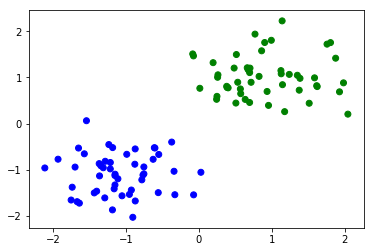

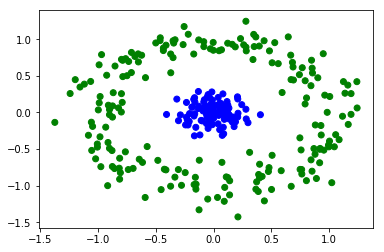

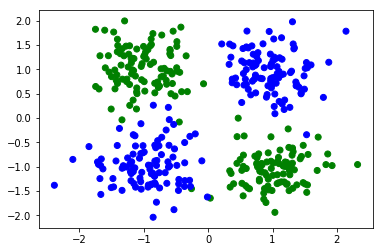

In [3]:
#Load data and plot the three cases
plt.figure()
X, y = gen_data("2blop")
plot_data(X,y)

plt.figure()
X, y = gen_data("blop_circle")
plot_data(X,y)

plt.figure()
X, y = gen_data("4blop")
plot_data(X,y)

plt.show()

In [4]:
#Parameters for NN
num_classes = 2
opt = "adam"
loss_f = 'categorical_crossentropy'
batch_size = 64
nb_epochs = 100

## 2blop Dataset

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


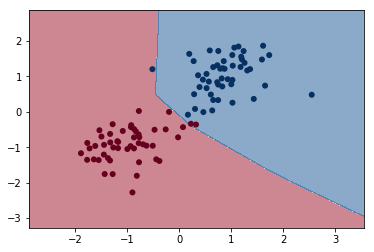

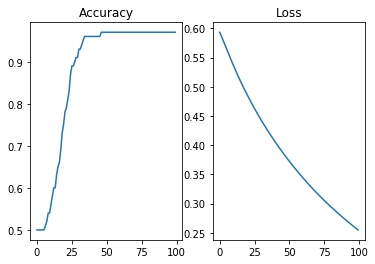

In [5]:
#Load dataset and fit 
X, y = gen_data("2blop")
y_cat = np_utils.to_categorical(y, num_classes)

model = Sequential()
model.add(Dense(3, activation="relu", input_dim=2))
model.add(Dense(5, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

#Compile the model
model.compile(optimizer = opt, loss = loss_f, metrics=["accuracy"])


hist = model.fit(X, y_cat, batch_size = batch_size, epochs=nb_epochs, verbose=0)

#Plot decision boundary
plot_decision_boundary(X, y, model, cmap='RdBu')

#Plot how the training went
plt.figure()
plot_training(hist)

plt.show()

## Blop_circle dataset

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 22        
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


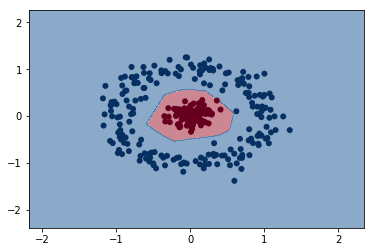

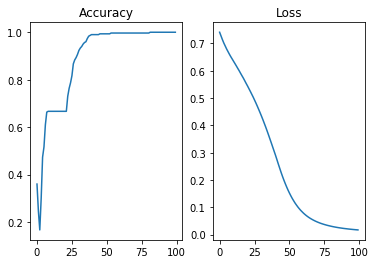

In [6]:
#Load dataset and fit 
X, y = gen_data("blop_circle")
y_cat = np_utils.to_categorical(y, num_classes)

model = Sequential()
model.add(Dense(5, activation="relu", input_dim=2))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

#Compile the model
model.compile(optimizer = opt, loss = loss_f, metrics=["accuracy"])

#Fit the model
hist = model.fit(X, y_cat, batch_size = batch_size,
                 epochs=nb_epochs, verbose=0)

#Plot decision boundary
plot_decision_boundary(X, y, model, cmap='RdBu')
plt.show()

#Plot how the training went
plt.figure()
plot_training(hist)

plt.show()

## Cricle_blop dataset

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_17 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_18 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 22        
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


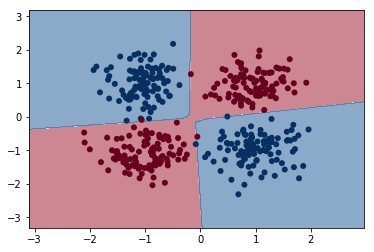

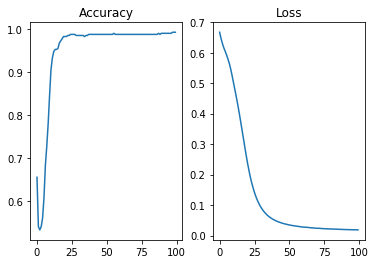

In [29]:
#Load dataset and fit 
X, y = gen_data("4blop")
y_cat = np_utils.to_categorical(y, num_classes)

model = Sequential()
model.add(Dense(5, activation="relu", input_dim=2))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

#Compile the model
model.compile(optimizer = opt, loss = loss_f, metrics=["accuracy"])

#Fit the model
hist = model.fit(X, y_cat, batch_size = batch_size,
                 epochs=nb_epochs, verbose=0)

#Plot decision boundary
plot_decision_boundary(X, y, model, cmap='RdBu')
plt.show()

#Plot how the training went
plt.figure()
plot_training(hist)

plt.show()